In [2]:
import pandas as pd
data = pd.read_csv('/content/twitter_training.csv', on_bad_lines='skip')


In [3]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
data.shape

(53826, 4)

In [5]:
data.columns=['number','country','sentiment','text']

In [6]:
data.head()

,number,country,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
data.isnull().sum()

number         0
country        0
sentiment      0
text         492
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

number       0
country      0
sentiment    0
text         0
dtype: int64

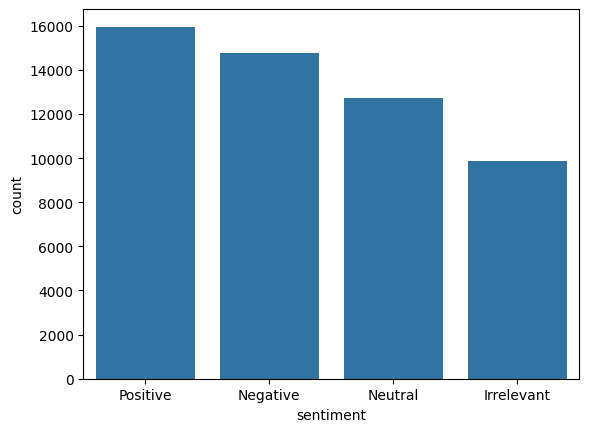

In [10]:
import seaborn as sns
ax=sns.barplot(x=data.sentiment.value_counts().index,y=data.sentiment.value_counts())

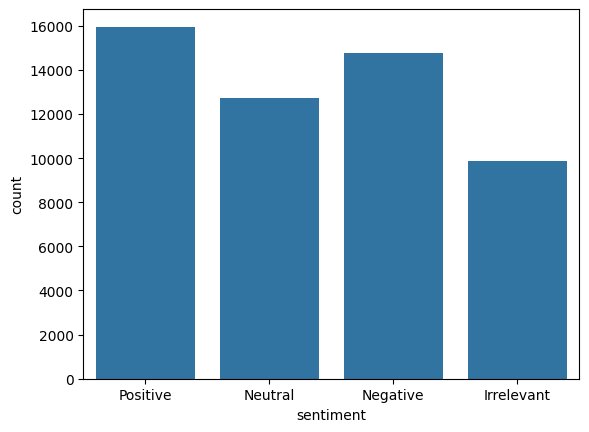

In [11]:
ax=sns.countplot(x=data.sentiment)

<Axes: xlabel='sentiment'>

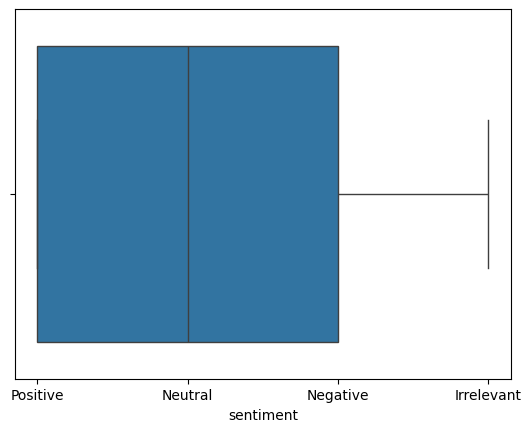

In [12]:
sns.boxplot(x=data.sentiment)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=1000)
x=data['text']
y=data['sentiment']
x_train=tfidf.fit_transform(x)

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_train=label_encoder.fit_transform(y)

In [15]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_resample,y_resample=smote.fit_resample(x_train,y_train)

In [16]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_resample,y_resample)

RandomForestClassifier()

In [18]:
validation_data=pd.read_csv('/content/twitter_validation.csv')


In [19]:
validation_data.columns=['number','country','sentiment','text']

In [20]:
validation_data.head()

,number,country,sentiment,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


<Axes: xlabel='sentiment', ylabel='count'>

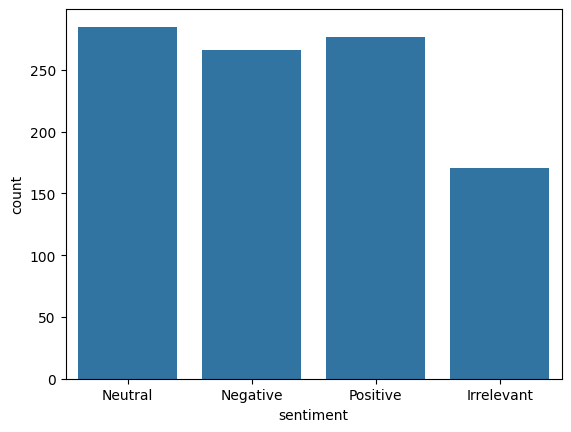

In [22]:
sns.countplot(x=validation_data.sentiment)

In [25]:
x=tfidf.transform(validation_data['text'])
y=label_encoder.transform(validation_data['sentiment'])


In [26]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_resam,y_resam=smote.fit_resample(x,y)

In [30]:
predict=model.predict(x_resam)

In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(predict,y_resam))

0.8192982456140351


In [32]:
from sklearn.ensemble import AdaBoostClassifier
model2=AdaBoostClassifier()
model2.fit(x_resample,y_resample)

AdaBoostClassifier()

In [34]:
pred2=model2.predict(x_resam)

In [35]:
accuracy_score(pred2,y_resam)

0.49736842105263157

In [36]:
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier()
model3.fit(x_resample,y_resample)

KNeighborsClassifier()

In [37]:
pred3=model3.predict(x_resam)

In [38]:
accuracy_score(pred3,y_resam)

0.7640350877192983

In [39]:
from sklearn.linear_model import LogisticRegression
model4=LogisticRegression()
model4.fit(x_resample,y_resample)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
pred4=model4.predict(x_resam)

In [42]:
accuracy_score(pred4,y_resam)

0.6675438596491228